# Вариант 2 #
## Задание 1. A/B–тестирование ##
#### 1.1 Условие ####

Одной из основных задач аналитика в нашей команде является корректное проведение экспериментов. Для этого мы применяем метод A/B–тестирования. В ходе тестирования одной гипотезы целевой группе была предложена новая механика оплаты услуг на сайте, у контрольной группы оставалась базовая механика. В качестве задания Вам необходимо проанализировать итоги эксперимента и сделать вывод, стоит ли запускать новую механику оплаты на всех пользователей.

#### 1.2 Входные данные ####

В качестве входных данных Вы имеете 4 csv-файла:

    groups.csv - файл с информацией о принадлежности пользователя к контрольной или экспериментальной группе (А – контроль, B – целевая группа) 
    groups_add.csv - дополнительный файл с пользователями, который вам прислали спустя 2 дня после передачи данных
    active_studs.csv - файл с информацией о пользователях, которые зашли на платформу в дни проведения эксперимента. 
    checks.csv - файл с информацией об оплатах пользователей в дни проведения эксперимента. 

Импортируем библиотеки

In [1]:
import pandas as pd
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import pingouin
import statsmodels.api as sm
import scipy
import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats import fisher_exact
from scipy.stats import bootstrap
from tqdm.auto import tqdm
%matplotlib inline
import pandahouse as ph
from urllib.parse import urlencode
import requests
import urllib.request
import ssl
import matplotlib.dates as mdates


Добавляем фичу со стаковерфло чтоб показать все таблицы сразу в одной строке

In [2]:
CSS = """
.output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(CSS))

Загружаем все базы  
*Загрузка файлов в этой работе происходит со скопированных на свой диск данных, т.к. в исходнике превышено допустимое количество скачиваний*

In [3]:
'''url = 'https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/BGUnozLF9sKbcg'
context = ssl._create_unverified_context()
response = urllib.request.urlopen(url, context=context)
df_groups = pd.read_csv(response, sep=';')

url = 'https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/xvuNkPJVO6z3iQ'
context = ssl._create_unverified_context()
response = urllib.request.urlopen(url, context=context)
df_groups_add = pd.read_csv(response)

url = 'https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/KYCJSYL9HieXJA'
context = ssl._create_unverified_context()
response = urllib.request.urlopen(url, context=context)
df_active_studs = pd.read_csv(response)

url = 'https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/NiJJB8qIAnPOHg'
context = ssl._create_unverified_context()
response = urllib.request.urlopen(url, context=context)
df_checks = pd.read_csv(response, sep=';')

display(df_groups.head(), df_groups_add.head(), df_active_studs.head(), df_checks.head())'''

"url = 'https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/BGUnozLF9sKbcg'\ncontext = ssl._create_unverified_context()\nresponse = urllib.request.urlopen(url, context=context)\ndf_groups = pd.read_csv(response, sep=';')\n\nurl = 'https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/xvuNkPJVO6z3iQ'\ncontext = ssl._create_unverified_context()\nresponse = urllib.request.urlopen(url, context=context)\ndf_groups_add = pd.read_csv(response)\n\nurl = 'https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/KYCJSYL9HieXJA'\ncontext = ssl._create_unverified_context()\nresponse = urllib.request.urlopen(url, context=context)\ndf_active_studs = pd.read_csv(response)\n\nurl = 'https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/NiJJB8qIAnPOHg'\ncontext = ssl._create_unverified_context()\nresponse = urllib.request.urlopen(url, context=context)\ndf_checks = pd.read_csv(response, sep=';')\n\ndisplay(df_groups.head(), df_groups_add.head(), df_active_studs.head(),

In [4]:
'''# Вариант с оригинальными ссылками
url = 'https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/UhyYx41rTt3clQ'
context = ssl._create_unverified_context()
response = urllib.request.urlopen(url, context=context)
df_groups = pd.read_csv(response, sep=';')

url = 'https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/5Kxrz02m3IBUwQ'
context = ssl._create_unverified_context()
response = urllib.request.urlopen(url, context=context)
df_groups_add = pd.read_csv(response)

url = 'https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/Tbs44Bm6H_FwFQ'
context = ssl._create_unverified_context()
response = urllib.request.urlopen(url, context=context)
df_active_studs = pd.read_csv(response)

url = 'https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/pH1q-VqcxXjsVA'
context = ssl._create_unverified_context()
response = urllib.request.urlopen(url, context=context)
df_checks = pd.read_csv(response, sep=';')

display(df_groups.head(), df_groups_add.head(), df_active_studs.head(), df_checks.head())'''

"# Вариант с оригинальными ссылками\nurl = 'https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/UhyYx41rTt3clQ'\ncontext = ssl._create_unverified_context()\nresponse = urllib.request.urlopen(url, context=context)\ndf_groups = pd.read_csv(response, sep=';')\n\nurl = 'https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/5Kxrz02m3IBUwQ'\ncontext = ssl._create_unverified_context()\nresponse = urllib.request.urlopen(url, context=context)\ndf_groups_add = pd.read_csv(response)\n\nurl = 'https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/Tbs44Bm6H_FwFQ'\ncontext = ssl._create_unverified_context()\nresponse = urllib.request.urlopen(url, context=context)\ndf_active_studs = pd.read_csv(response)\n\nurl = 'https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/pH1q-VqcxXjsVA'\ncontext = ssl._create_unverified_context()\nresponse = urllib.request.urlopen(url, context=context)\ndf_checks = pd.read_csv(response, sep=';')\n\ndisplay(df_groups.head(), df_groups

Еще один вариант загрузки данных для искушённых.

In [101]:
#Будет показывать ошибку KeyError: 'href' из-за превышенного лимита скачиваний
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key_groups = 'https://disk.yandex.ru/d/UhyYx41rTt3clQ'
public_key_groups_add = 'https://disk.yandex.ru/d/5Kxrz02m3IBUwQ'
public_key_active_studs = 'https://disk.yandex.ru/d/Tbs44Bm6H_FwFQ'
public_key_checks = 'https://disk.yandex.ru/d/pH1q-VqcxXjsVA'

In [102]:
def download_data(public_key):
    final_url = base_url + urlencode(dict(public_key=public_key))
    response_active = requests.get(final_url)
    download_url = response_active.json()['href']
    return download_url

In [103]:
download_url = download_data(public_key_groups)
df_groups = pd.read_csv(download_url, sep=';')

download_url = download_data(public_key_groups_add)
df_group_add = pd.read_csv(download_url)

download_url = download_data(public_key_active_studs)
df_active_students = pd.read_csv(download_url)

download_url = download_data(public_key_checks)
df_checks = pd.read_csv(download_url, sep=';')

display(df_groups.head(), df_groups_add.head(), df_active_studs.head(), df_checks.head())

KeyError: 'href'

In [104]:
'''df_groups = pd.read_csv('Проект_2_groups.csv', sep=';')
df_groups_add = pd.read_csv('Проект_2_group_add.csv')
df_active_studs = pd.read_csv('Проект_2_active_studs.csv')
df_checks = pd.read_csv('Проект_2_checks.csv', sep=';')
display(df_groups.head(), df_groups_add.head(), df_active_studs.head(), df_checks.head())'''

,id,grp
0,1489,B
1,1627,A
2,1768,B
3,1783,B
4,1794,A


,id,grp
0,5694584,B
1,5694830,B
2,5695057,B
3,5698872,B
4,5699067,B


,student_id
0,581585
1,5723133
2,3276743
3,4238589
4,4475369


,student_id,rev
0,1627,990.0
1,3185,690.0
2,25973,690.0
3,26280,690.0
4,100300,990.0


посмотрим есть ли пересечения по id между таблицей принадлежности людей к контрольной или тестируемой группам и таблицей с дополнительными данными присланной через два дня

In [6]:
df1 = df_groups.merge(df_groups_add, on='id')

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      0 non-null      int64 
 1   grp_x   0 non-null      object
 2   grp_y   0 non-null      object
dtypes: int64(1), object(2)
memory usage: 0.0+ bytes


путем объединения таблиц видно, что пересечений по id не выявлено.
Попробуем найти пересечение через серии id

In [8]:
series1 = df_groups.id
series2 = df_groups_add.id

In [9]:
series1

0           1489
1           1627
2           1768
3           1783
4           1794
          ...   
74479    5692459
74480    5692572
74481    5692865
74482    5693667
74483    5694419
Name: id, Length: 74484, dtype: int64

In [10]:
set(series1) & set(series2)

set()

Пересечений нет.  
Посмотрим количество участников эксперимента в каждой из групп в исходной таблице с данными.

In [11]:
df_groups.grp.value_counts()

B    59813
A    14671
Name: grp, dtype: int64

Объединим наши исходные с добавочными данные

In [12]:
df_groups_and_add = pd.concat((df_groups, df_groups_add), ignore_index=True)
df_groups_and_add.head()

,id,grp
0,1489,B
1,1627,A
2,1768,B
3,1783,B
4,1794,A


Посмотрим на данные в таблицах с информацией об активности и об оплатах.

In [13]:
df_active_studs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8341 entries, 0 to 8340
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   student_id  8341 non-null   int64
dtypes: int64(1)
memory usage: 65.3 KB


In [14]:
df_checks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   student_id  541 non-null    int64  
 1   rev         541 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 8.6 KB


Пропусков значений не выявлено.  
Переименуем колонку student_id в id чтоб было удобнее потом объединять таблицы.

In [15]:
df_active_studs.rename(columns={'student_id':'id'}, inplace = True )
df_active_studs.head()

,id
0,581585
1,5723133
2,3276743
3,4238589
4,4475369


Добавим колонку с единицей у активных людей для дальнейшего анализа.

In [16]:
df_active_studs['active'] = '1'
df_active_studs.head()

,id,active
0,581585,1
1,5723133,1
2,3276743,1
3,4238589,1
4,4475369,1


Добавим к данным с распределением по группам данные об активности.

In [17]:
df_and_active = df_groups_and_add.merge(df_active_studs, how='left', on='id')
df_and_active.head()

,id,grp,active
0,1489,B,NaN
1,1627,A,1
2,1768,B,NaN
3,1783,B,NaN
4,1794,A,NaN


В таблице с оплатами тоже переименуем колонку student_id в id для удобства объединения. Еще добавим колонку с единицами тем, у кого были оплаты. И объединим со всеми предыдущими данными.

In [18]:
df_checks.rename(columns={'student_id':'id'}, inplace = True )
df_checks['pay'] = 1
df_checks.head()

,id,rev,pay
0,1627,990.0,1
1,3185,690.0,1
2,25973,690.0,1
3,26280,690.0,1
4,100300,990.0,1


In [19]:
df_all = df_and_active.merge(df_checks, how='left', on='id')
df_all.head()

,id,grp,active,rev,pay
0,1489,B,NaN,NaN,NaN
1,1627,A,1,990.0,1.0
2,1768,B,NaN,NaN,NaN
3,1783,B,NaN,NaN,NaN
4,1794,A,NaN,NaN,NaN


In [20]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74576 entries, 0 to 74575
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      74576 non-null  int64  
 1   grp     74576 non-null  object 
 2   active  8341 non-null   object 
 3   rev     541 non-null    float64
 4   pay     541 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 3.4+ MB


В получившейся таблице у нас из 74576 человек вышло 8341 активных и 541 оплативших пользователей.

Посмотрим сколько человек у нас стало в контрольной (A) и тестируемой (B) группах после объединения всех таблиц.

In [21]:
group_clustering = df_all.groupby('grp', as_index=False) \
                                 .agg({'id': 'count'}) \
                                 .rename(columns={'id': 'count_users', 'grp': 'droup'})
group_clustering

,droup,count_users
0,A,14693
1,B,59883


А сколько человек в группах в процентном соотношении?

In [22]:
group_clustering['percent'] = (group_clustering.count_users / df_all.shape[0] * 100).round(1)
group_clustering

,droup,count_users,percent
0,A,14693,19.7
1,B,59883,80.3


Надо посмотреть сколько человек из 541 оплативших у нас НЕ были активными!

In [23]:
df_only_rev = df_all.fillna(0)
df_only_rev

,id,grp,active,rev,pay
0,1489,B,0,0.0,0.0
1,1627,A,1,990.0,1.0
2,1768,B,0,0.0,0.0
3,1783,B,0,0.0,0.0
4,1794,A,0,0.0,0.0
...,...,...,...,...,...
74571,200247820,B,0,0.0,0.0
74572,201032527,B,0,0.0,0.0
74573,201067612,B,0,0.0,0.0
74574,201067653,B,0,0.0,0.0


In [24]:
df_only_rev.query('rev > 0').query('active == 0').grp.value_counts()

B    120
A     29
Name: grp, dtype: int64

In [25]:
df_checks.shape[0] - df_only_rev.query('rev > 0').query('active == 0').shape[0]

392

392 человека оплатили и были при этом активны в период теста. У нас оплатили, но не были активны 120 человек из тестируемой группы и 29 человек из контрольной! Возможно, где-то закралась ошибка. А может у этих людей был подключен автоплатеж. Можно посмотреть суммы списания у этих людей:

In [26]:
df_only_rev.query('rev > 0'). \
            query('active == 0'). \
            groupby('rev', as_index=False). \
            agg({'id':'count'}).rename(columns={'id': "times"}) \
            .sort_values('times', ascending = False)

,rev,times
5,690.0000,61
1,290.0000,24
7,990.0000,19
0,199.0000,14
8,1140.0000,14
3,580.0000,4
10,1900.0000,4
6,840.0000,3
2,398.0000,2
4,630.0000,1


Все суммы разные, это может быть автоматическое списание за какое-либо количество прорешенных задач или использованных дней подписки.

Посмотрим сколько человек в % из оплативших не заходили на сайт в дни теста

In [27]:
round(df_only_rev.query('rev > 0')
                  .query('active == 0')
                  .agg({'id':'count'}) / df_only_rev.query('rev > 0')
                                                      .agg({'id':'count'}) * 100, 2)

id    27.54
dtype: float64

27,5% от общего количества оплативших не были активны в дни теста на сайте.

Можно еще посмотреть какой % суммы от общей суммы оплаты пришёлся на неактивных в период теста пользователей:

In [28]:
round(df_only_rev.query('rev > 0')
                  .query('active == 0')
                  .agg({'rev':'sum'})/ df_only_rev.query('rev > 0')
                                                      .agg({'rev':'sum'}) * 100, 2)

rev    18.41
dtype: float64

Сколько всего денег принесли активные пользователи в контрольной и в тестируемой группах?

In [29]:
df_sum_of_money = df_only_rev.query('active == "1"') \
                            .groupby('grp', as_index=False) \
                            .agg({'rev':'sum'}) \
                            .rename(columns= {'rev':'sum_money', 'grp':'group'}) \
                            .round()
df_sum_of_money

,group,sum_money
0,A,72820.0
1,B,394974.0


Посмотри на графике

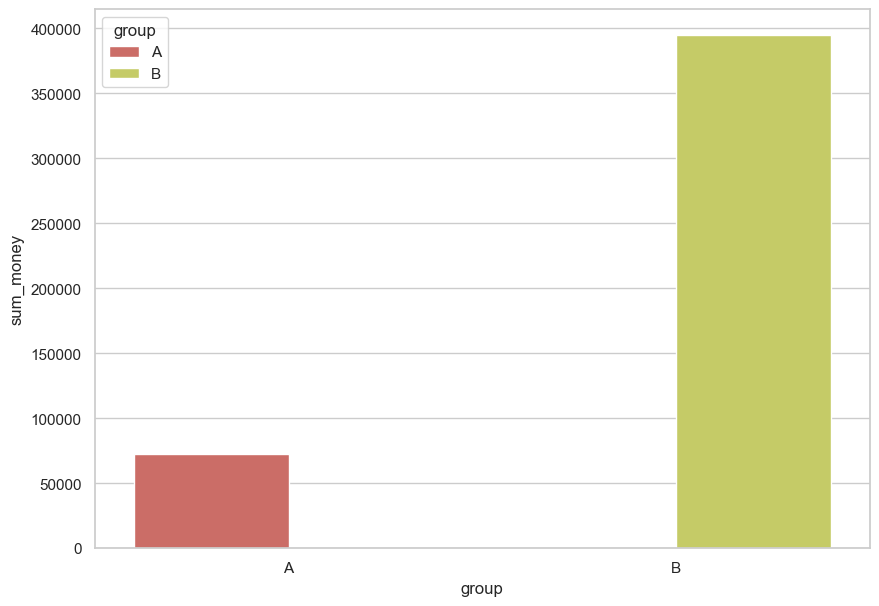

In [30]:
sns.set(rc={'figure.figsize' : (10, 7)}, style="whitegrid", palette="hls")
sns.barplot(data=df_sum_of_money, x="group", y = "sum_money", hue="group")
plt.show()

Такой разрыв вполне может быть из-за неравномерного распределения людей по группам.

А какие суммы у нас проходили? Были ли странности?

In [31]:
df_only_rev.query('rev > 0').rev.value_counts()

1900.0000    97
290.0000     94
690.0000     78
199.0000     46
990.0000     41
1900.0001    36
840.0000     27
1140.0000    25
580.0000     15
590.0000     11
398.0000      9
1530.0000     8
870.0000      6
3660.0000     5
1980.0000     4
2890.0000     4
2910.0000     4
489.0000      3
1160.0000     3
2099.0000     3
2820.0000     2
1180.0000     2
2220.0000     2
2900.0000     1
1830.0000     1
597.0000      1
1339.0000     1
1968.0000     1
1050.0000     1
630.0000      1
1729.0000     1
1388.0000     1
2190.0000     1
4650.0000     1
796.0000      1
3040.0000     1
880.0000      1
3260.0000     1
1039.0000     1
Name: rev, dtype: int64

In [32]:
# Сколько всего у нас уникальных значений сумм?
df_only_rev.query('rev > 0').rev.nunique()

39

1900.0001 очень сильно выбивается из общего списка, скорее всего был сбой. Надо обратить внимание программистов на округление сумм или на типы данных! Хотя проблема может прятаться и не там.

Сделаем датасет с только оплатившими людьми.

In [33]:
df_pay = df_only_rev.query('rev > 0')
df_pay.head()

,id,grp,active,rev,pay
1,1627,A,1,990.0,1.0
39,3185,B,0,690.0,1.0
121,25973,B,0,690.0,1.0
125,26280,B,0,690.0,1.0
220,100300,B,1,990.0,1.0


Глянем, есть ли повторяющиеся id

In [34]:
df_pay.id.value_counts().max()

1

Повторяющихся id нет

Посмотрим на какие примерно суммы приходится большая часть оплат в обеих группах, для этого разобьем все оплаты на 5 категорий:

In [35]:
df_pay_control = df_pay.query('grp == "A"').rev.value_counts(normalize=True, bins=5).round(2)
df_pay_control

(195.53799999999998, 891.2]    0.71
(891.2, 1583.4]                0.17
(2275.6, 2967.8]               0.06
(1583.4, 2275.6]               0.04
(2967.8, 3660.0]               0.03
Name: rev, dtype: float64

In [36]:
df_pay_test = df_pay.query('grp == "B"').rev.value_counts(normalize=True, bins=5).round(2)
df_pay_test

(194.548, 1089.2]    0.58
(1089.2, 1979.4]     0.38
(2869.6, 3759.8]     0.02
(1979.4, 2869.6]     0.02
(3759.8, 4650.0]     0.00
Name: rev, dtype: float64

А если в точных суммах посмотреть на топ 10 сумм оплат в обеих группах?

In [37]:
# контрольная группа:
df_pay.query('grp == "A"').rev.value_counts().head(10)

290.0     31
690.0     19
199.0      7
990.0      6
580.0      6
590.0      5
1140.0     5
1530.0     3
840.0      3
3660.0     3
Name: rev, dtype: int64

In [38]:
# тестируемая группа
df_pay.query('grp == "B"').rev.value_counts().head(10)

1900.0000    97
290.0000     63
690.0000     59
199.0000     39
1900.0001    36
990.0000     35
840.0000     24
1140.0000    20
580.0000      9
398.0000      7
Name: rev, dtype: int64

Топ 3 проходящих оплат пришлась в контрольной группе на суммы от 199 до 690р,с уклоном в меньшую сторону, тогда как в целевой группе от 290 до 1900р с явным превосходством 1900р как чека.

Необходимо посмотреть количество человек в контрольной и тестируемой группах в датасете с данными только оплативших людей.

In [39]:
df_count = df_pay.groupby('grp', as_index=False).agg({'id':'count'}).rename(columns={'id': "count_users"})
df_count['percent'] = (df_count.count_users / df_pay.shape[0] * 100).round(1)
df_count

,grp,count_users,percent
0,A,107,19.8
1,B,434,80.2


А если посмотреть соотношение людей в датасете, где указаны оплатившие и неоплатившие люди?

In [40]:
df_count_all = df_all.groupby('grp', as_index=False).agg({'id':'count'}).rename(columns={'id': "count_users"})
df_count_all['percent'] = (df_count_all.count_users / df_all.shape[0] * 100).round(1)
df_count_all

,grp,count_users,percent
0,A,14693,19.7
1,B,59883,80.3


Видно, что процент контрольной и тестируемой групп не сильно отличается в исходном наборе данных и в наборе данных с только проплатившими подписку людьми.

Продолжим работать с датасетом только оплативших активных людей. Нет смысла смотреть неактивных людей, так как нам интересен результат теста. Можем посмотреть наглядно количество оплат от контрольной и тестовой групп:

In [41]:
df_pay_active = df_pay.query('active == "1"').rename(columns={'rev': "price"})
df_pay_active.head()

,id,grp,active,price,pay
1,1627,A,1,990.0000,1.0
220,100300,B,1,990.0000,1.0
320,108270,B,1,290.0000,1.0
3779,264473,B,1,1900.0001,1.0
4187,274352,B,1,690.0000,1.0


In [42]:
df_pay_active.shape

(392, 5)

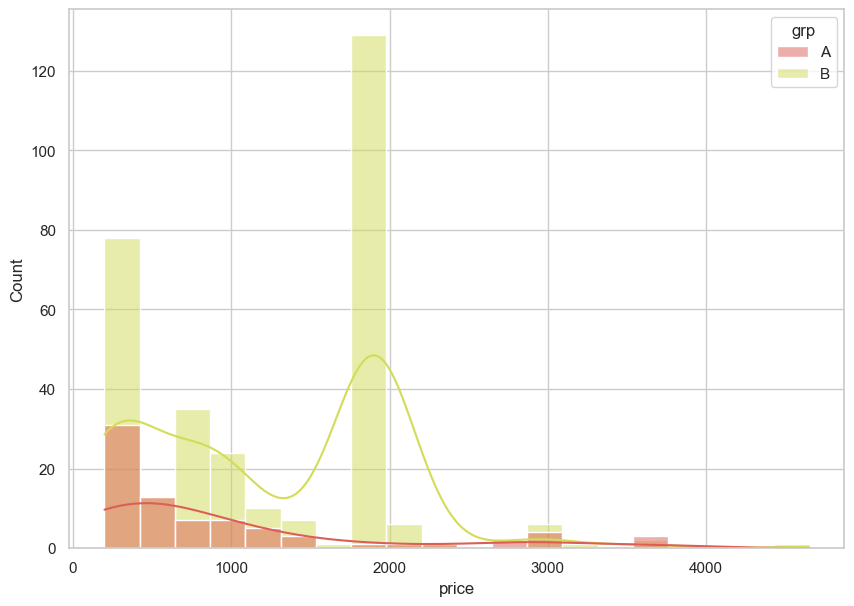

In [43]:
# сначала посмотрим как распределяются оплаты относительно контрольной и тестовой групп
sns.histplot(data=df_pay_active, x='price', hue='grp', bins=20, kde=True)
# bins берем за 20, т.к. уникальных значений сумм у нас 39, но там почти половина это по 1-2 оплаты,
# значит количество подгрупп можно сократить в два раза, если сократить больше, то будет не так наглядно
plt.show()

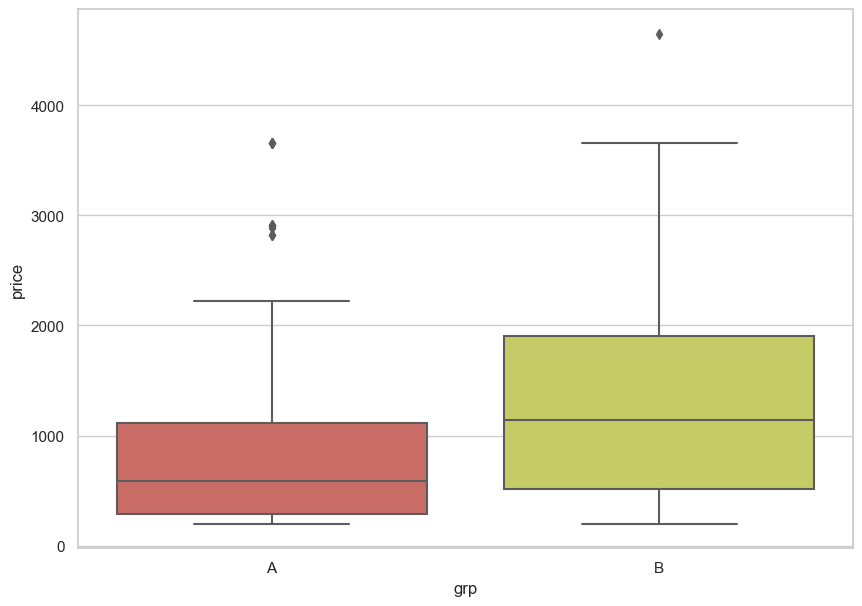

In [44]:
sns.boxplot(data=df_pay_active, y='price', x='grp')
plt.show()

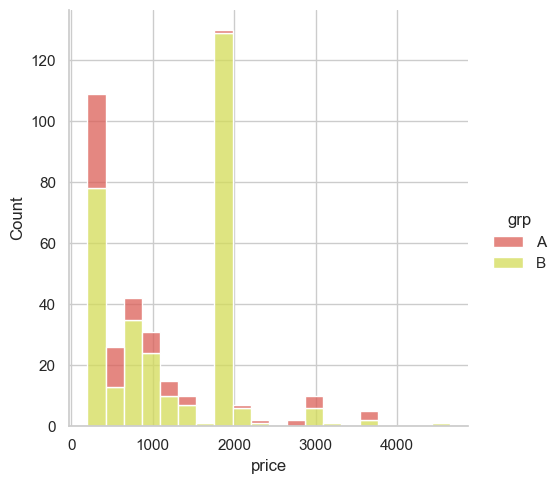

In [45]:
# теперь можно наглядно увидеть какую долю от общих оплат фиксированных сумм оплатили люди из контрольной,
# а какую из тестовой группы
sns.displot(data=df_pay_active, x='price', hue='grp', multiple="stack", bins=20)
plt.show()

#### 1.3 Вопросы ####

Предлагаем Вам ответить на следующие вопросы:

    На какие метрики Вы смотрите в ходе анализа и почему?
    Имеются ли различия в показателях и с чем они могут быть связаны?
    Являются ли эти различия статистически значимыми?
    Стоит ли запускать новую механику на всех пользователей?

За основные метрики мы можем взять конверсию CR, средний доход на платящего пользователя ARPPU, средний доход с привлечённого пользователя ARPU:

    CR это отношение в нашем случае оплативших людей  / к количеству людей активных в период эксперимента
    ARPPU это итоговая сумма / число оплативших
    ARPU это уже средняя выручка на одного клиента, считается как ARPPU * CR
Метрик связанных со временем мы взять не можем за неимением временных данных.


In [46]:
# сначала отберем только активных в дни эксперимента людей
df_only_active = df_all.query('active == "1"')
df_only_active = df_only_active.fillna(0)
df_only_active.head()

,id,grp,active,rev,pay
1,1627,A,1,990.0,1.0
10,2085,B,1,0.0,0.0
12,2215,B,1,0.0,0.0
43,3391,A,1,0.0,0.0
45,3401,B,1,0.0,0.0


In [47]:
# А теперь сделаем таблицу с необходимыми для метрик данными
df_count_of_active = df_only_active.groupby('grp', as_index=False) \
                                    .agg({'id':'count', 'pay':'sum', 'rev': 'sum'}) \
                                    .rename(columns = {'id': 'count_active', 'grp':'group', 'pay': 'count_active_and_pay', 'rev' : 'total_amount'}) 
                                    
df_count_of_active

,group,count_active,count_active_and_pay,total_amount
0,A,1538,78.0,72820.0000
1,B,6803,314.0,394974.0035


In [48]:
CR_A = (df_count_of_active.query('group == "A"')
                            .count_active_and_pay / df_count_of_active.query('group == "A"')
                                                                        .count_active)
CR_A.mul(100).round(2)

0    5.07
dtype: float64

In [49]:
CR_B = (df_count_of_active.query('group == "B"')
                            .count_active_and_pay / df_count_of_active.query('group == "B"')
                                                                        .count_active)
CR_B.mul(100).round(2)

1    4.62
dtype: float64

Метрика ARPPU:

In [50]:
ARPPU_A = (df_count_of_active.query('group == "A"')
                               .total_amount / df_count_of_active.query('group == "A"')
                                                                   .count_active_and_pay)
ARPPU_A.round(2)

0    933.59
dtype: float64

In [51]:
ARPPU_B = (df_count_of_active.query('group == "B"')
                               .total_amount / df_count_of_active.query('group == "B"')
                                                                   .count_active_and_pay)
ARPPU_B.round(2)

1    1257.88
dtype: float64

Метрика ARPU:

In [52]:
ARPU_A = (df_count_of_active.query('group == "A"')
                               .total_amount / df_count_of_active.query('group == "A"')
                                                                   .count_active)
ARPU_A.round(2)

0    47.35
dtype: float64

In [53]:
ARPU_B = (df_count_of_active.query('group == "B"')
                               .total_amount / df_count_of_active.query('group == "B"')
                                                                   .count_active)
ARPU_B.round(2)

1    58.06
dtype: float64

In [54]:
# Можем перепроверить значение метрики ARPU для контрольной группы
(CR_A * ARPPU_A).round(2) == ARPU_A.round(2)

0    True
dtype: bool

In [55]:
# Можем перепроверить значение метрики ARPU для тестируемой группы
(CR_B * ARPPU_B).round(2) == ARPU_B.round(2)

1    True
dtype: bool

Из наших метрик стало видно, что конверсия в оплату у контрольной группы выше почти на 0,5%, чем у тестируемой. Показатели же доходов фиксируют разницу на 324,3 пункта в пользу тестируемой группы активных и платящих людей, и разницу на 10,71 пункт в пользу тестируемой группы активных людей. Не будем забывать о различиях в размерах групп

Теперь необходимо посмотреть гомогенность и нормальность распределения в наших группах для выбора тестов и проверки стат значимости наших исследований.

Можно посмотреть нормальность распределения.

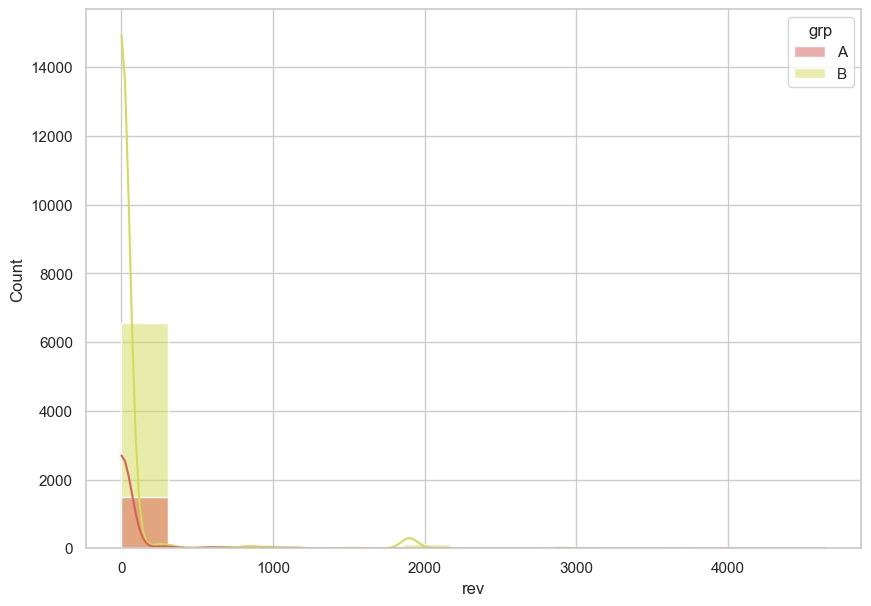

In [58]:
sns.histplot(data=df_only_active, x="rev", hue='grp', kde=True)
plt.show()

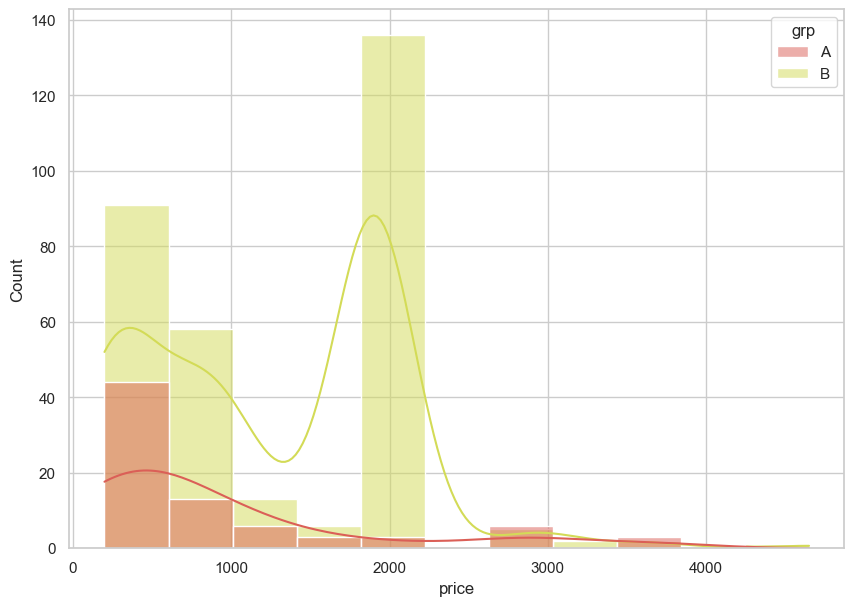

In [64]:
sns.histplot(data=df_pay_active, x="price", hue='grp', kde=True)
plt.show()

Визуально видно, что обе выборки у нас не распределены нормально, т.к. не имеют формы колокола,а имеют несколько мод, но визуального теста не достаточно. Данные у нас количественные, более того, они дискретные, а значит необходимо проверить распределение на нормальность, сделать это можно через через normaltest, где 
    
    H₀- распределение нормальное
    H₁- распределение ненормальное
    р- уровень значимости 0.05
    
В графе normal будет указано:
    
    True - распределение является нормальным 
    False - распределение не является нормальным

In [59]:
pingouin.normality(data=df_only_active, dv="rev", group="grp", method="normaltest")

,W,pval,normal
grp,,,
A,2240.595797,0.0,False
B,7797.399212,0.0,False


In [65]:
pingouin.normality(data=df_pay_active, dv="price", group="grp", method="normaltest")

,W,pval,normal
grp,,,
A,30.378420,2.531687e-07,False
B,6.795663,3.344572e-02,False


Наши наблюдения о ненормальности распределений подтвердились.

Проверить гомогенность можно с помощью критерия Левена и критерия Фишера. Мы используем критерий Левена, с параметром центра равным медиане ибо распределения у нас несимметричны. 

    H₀ - дисперсия среди групп одинакова.
    H₁- дисперсия среди групп не одинакова.
    
    р-уровень значимости 0.05.

In [66]:
scipy.stats.levene(df_control.price, df_test.price, center='median')

LeveneResult(statistic=3.075681699981606, pvalue=0.08025675761347022)

p-value > 0.05, следовательно отклонить теорио о гомогенности дисперсий  мы не можем, а значит можем принимать нулевую гипотезу о гомогенности выборок.

#### Выберем тесты для наших метрик: ####
**1. В метрике CR(конверсии) у нас категориальные данные, поэтому для теста будем использовать в дальнейшем хи-квадрат, можно еще проверить на критерии Фишера.**  
**2. В метриках же ARPPU и ARPU у нас имеются выбросы и несколько мод, взять среднее мы не можем. Мы хотим оценить статистическую значимость различий в медианах и лучшим решением будет взять бутстрап.**

**1.CR**
    
    H₀ - Значимые различия конверсий между тестовой и контрольной группами отсутствуют и новая механика оплаты не влияет на конверсию, совпадения случайны.
    H₁ - Имеются значимые различия конверсий между тестовой и контрольной группами и новая механика оплаты влияет на конверсию.
    р-уровень значимости 0.05

In [67]:
df_count_of_active

,group,count_active,count_active_and_pay,total_amount
0,A,1538,78.0,72820.0000
1,B,6803,314.0,394974.0035


Делаем предвариетльные расчеты:

In [68]:
df_count_of_active.iloc[0][1] - df_count_of_active.iloc[0][2]

1460.0

In [69]:
df_count_of_active.iloc[1][1] - df_count_of_active.iloc[1][2]

6489.0

In [70]:
obs = np.array([[(df_count_of_active.iloc[0][1] - df_count_of_active.iloc[0][2]), df_count_of_active.iloc[0][2]],
                [(df_count_of_active.iloc[1][1] - df_count_of_active.iloc[1][2]), df_count_of_active.iloc[1][2]]])
res = chi2_contingency(obs)
chi_squared = res[1].round(3)
chi_squared

0.486

In [71]:
# Сделаем таблицу сопряжённости и посчитаем хи квадрат через нее
chi_squared_crosstab = pd.crosstab(df_only_active.grp, df_only_active.pay)
chi_squared_crosstab

pay,0.0,1.0
grp,,
A,1460,78
B,6489,314


In [72]:
chi_squared = chi2_contingency(chi_squared_crosstab)[1].round(3)
chi_squared

0.486

Критерий Фишера

In [73]:
fisher_exact(obs)[1].round(3)

0.463

Так как pvalue больше 0,05 мы не можем отклонить нулевую гипотезу. Метрика конверсии показала нам, что есть влияние от новой механики оплаты, а тесты показали, что на эти данные нельзя опираться, так как между ними нет статистически значимых отличий.

**2.APPRU и APRU**
    
    H₀ - Значимые различия между средними доходами тестовой и контрольной отсутствуют и новая механика оплаты не влияет на средний доход, совпадения случайны.
    H₁ - Имеются значимые различия между средними доходами тестовой и контрольной группами и новая механика оплаты влияет на средний доход.
    р-уровень значимости 0.05

In [74]:
# нам понадобятся два датасета: один с активными, второй с активными оплатившими людьми
display(df_only_active.head(), df_pay_active.head())

,id,grp,active,rev,pay
1,1627,A,1,990.0,1.0
10,2085,B,1,0.0,0.0
12,2215,B,1,0.0,0.0
43,3391,A,1,0.0,0.0
45,3401,B,1,0.0,0.0


,id,grp,active,price,pay
1,1627,A,1,990.0000,1.0
220,100300,B,1,990.0000,1.0
320,108270,B,1,290.0000,1.0
3779,264473,B,1,1900.0001,1.0
4187,274352,B,1,690.0000,1.0


In [75]:
# посмотрим медианную выручку. Из-за выбросов среднюю выручку смотреть хуже.
df_pay_active.groupby('grp').agg({'price': np.median})

,price
grp,
A,585.0
B,1140.0


In [76]:
# разобьем наши датасеты по группам для дальнейшего статтеста
for_arppu_A = df_pay_active.query('grp == "A"')
for_arppu_B = df_pay_active.query('grp == "B"')
for_arpu_A = df_only_active.query('grp == "A"')
for_arpu_B = df_only_active.query('grp == "B"')

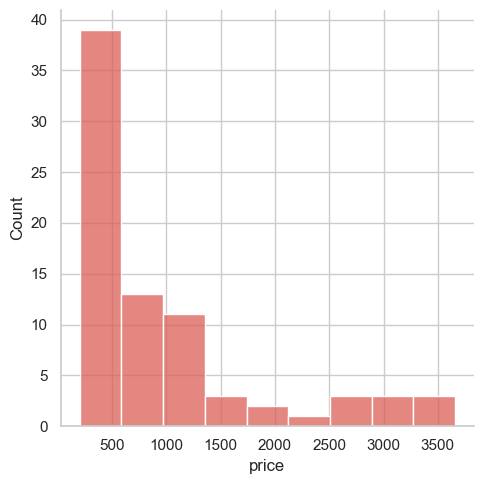

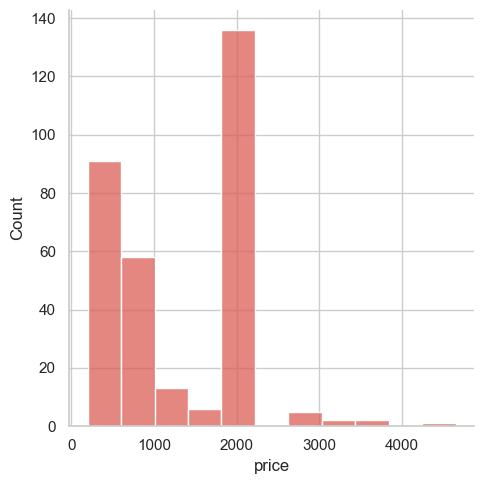

In [77]:
# еще раз посмотрим на распределение
sns.displot(data=df_pay_active[df_pay_active.grp == 'A'], x="price")
sns.displot(data=df_pay_active[df_pay_active.grp == 'B'], x="price")
plt.show()

In [78]:
# подготовим функции
def arpu_f(x):
    return np.median(x)

def arppu_f(y):
    return np.median(y)

Теперь необходимо создать функцию для бутстрап анализа

In [79]:
# функция для проверки гипотез с помощью бутстрапа
def get_bootstrap(
    data_column_1,                       # числовые значения контрольной выборки
    data_column_2,                       # числовые значения целевой выборки
    col_1,                               #название колонки первой выборки
    col_2,                               #название колонки второй выборки
    sample_count_1=0,                  #количество наблюдений для подвыборок
    sample_count_2=0,                  #количество наблюдений для подвыборок
    boot_it=10000,                     #количество бутстрэп-подвыборок
    statistic='median',                  #интересующая нас статистика
    bootstrap_conf_level=0.95,         #уровень значимости
    replace=True,                      #параметр возвращения
    max_len=True
):
    from scipy.stats import norm

    if sample_count_1 == 0:
        sample_count_1 = len(data_column_1[col_1])

    if sample_count_2 == 0:
        sample_count_2 = len(data_column_1[col_2])
    if max_len:
        boot_len = max([sample_count_1, sample_count_2])
    else:
        boot_len = min([sample_count_1, sample_count_2])

    boot_data = []
    smpl_1_data = []
    smpl_2_data = []
    for i in tqdm(range(boot_it)):         #извлекаем подвыборки
        if statistic == 'arpu':
            samples_1 = arpu(data_column_1.sample(boot_len, replace=replace))
            samples_2 = arpu(data_column_2.sample(boot_len, replace=replace))
        else:
            samples_1 = np.nanmean(data_column_1[col_1].sample(boot_len, replace=replace).values)
            samples_2 = np.nanmean(data_column_2[col_2].sample(boot_len, replace=replace).values)


        boot_data.append(samples_1-samples_2)
        smpl_1_data.append(samples_1)
        smpl_2_data.append(samples_2)

    pd_boot_data = pd.DataFrame(boot_data)

    # доверительный интервал
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    quants = pd_boot_data.quantile([left_quant, right_quant])

    p_1 = norm.cdf(
        x=0,
        loc=np.nanmean(boot_data),
        scale=np.nanstd(boot_data)
    )
    p_2 = norm.cdf(
        x=0,
        loc=-np.nanmean(boot_data),
        scale=np.nanstd(boot_data)
    )
    p_value = min(p_1, p_2) * 2

    #настройка визуализации
    _, _, bars = plt.hist(pd_boot_data[0], bins=30)
    for bar in bars:
        if bar.get_x() <= quants.iloc[0][0] or bar.get_x() >= quants.iloc[1][0]:
            bar.set_facecolor('#CB6D67')
        else:
            bar.set_facecolor('#C5CB67')
            bar.set_edgecolor('black')

    plt.style.use('ggplot')
    plt.vlines(quants, ymin=0, ymax=50, linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of bootstrap")
    plt.show()

    print('pvalue = ', p_value)
 
    return {"boot_data" : boot_data, 
            "quants" : quants, 
            "p_value" : p_value,
           "smpl_1_data" : smpl_1_data,
           "smpl_2_data" : smpl_2_data}

  0%|          | 0/10000 [00:00<?, ?it/s]

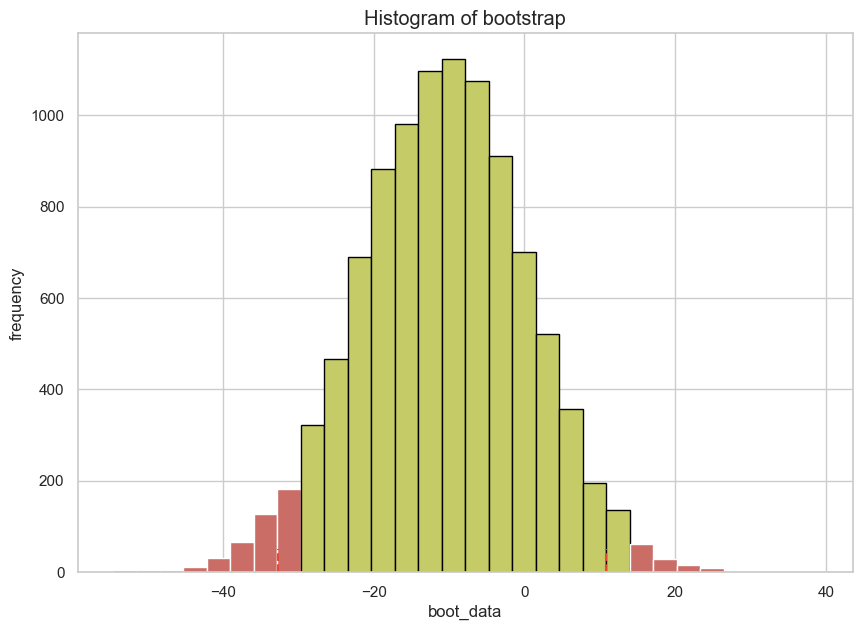

pvalue =  0.33027846946156636


In [80]:
arpu_bootstrap = get_bootstrap(data_column_1=for_arpu_A, col_1='rev',
                        data_column_2=for_arpu_B, col_2='rev',
                        boot_it=10000,
                        statistic='arpu_f')

Так как ноль входит в доверительный интервал, значит статистически значимых отличий может не быть. Мы не можем отвергнуть нулевую гипотезу. ARPU в контрольной и тестируемой группах статистически значимо не различаются.

  0%|          | 0/10000 [00:00<?, ?it/s]

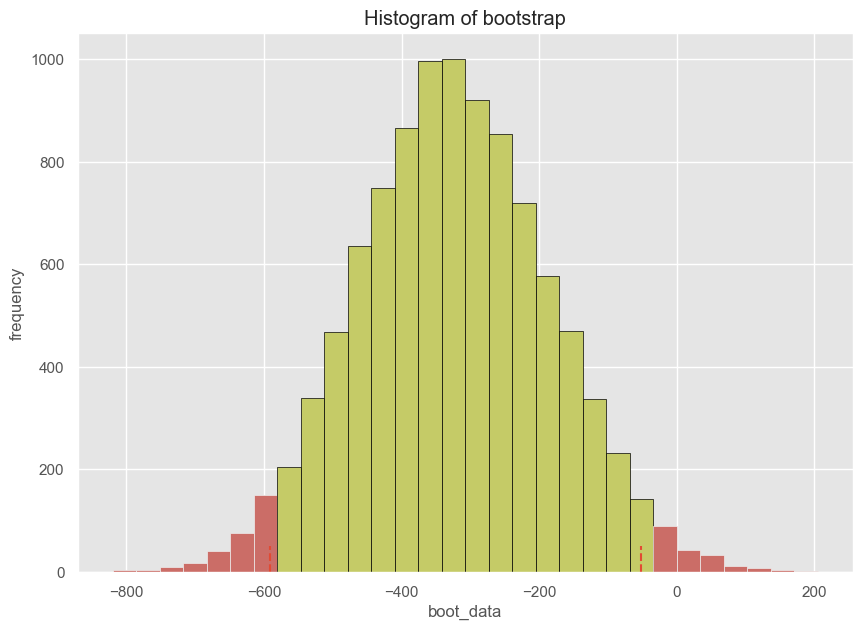

pvalue =  0.018760720428723867


In [81]:
arppu_bootstrap = get_bootstrap(data_column_1=for_arppu_A, col_1='price',
                        data_column_2=for_arppu_B, col_2='price',
                        boot_it=10000,
                        statistic='arppu_f')

Так как ноль не входит в доверительный интервал, мы имеем основания отклонить нулевую гипотезу и можем склоняться к принятию альтернативной. ARPPU в контрольной и тестируемой группах статистически значимо различаются.

**Вывод**  
    Сплитование изначально было сделано неправильно, т.к. размер контрольной группы меньше 20%, а целевой больше 80% от общего числа участников.  
    Было выявлено 149 человек, которые оплатили, но при этом не были активны на сайте, что являлось условием эксперимента. Возможно это прошла автооплата по подписке или могла закрасться ошибка. После изменения механики оплаты стало существенно больше оплат за 1900 около 22% и еще 8% оплатили на 1900.0001, одна сотая копейки может быть ошибкой в коде при взятии неверного формата данных, как вариант.  
    Конверсия в оплату у контрольной группы хоть показала результат выше, чем у целевой почти на 0,5%, но опираться на эти данные нельзя, так как тест не показал статистически значимых различий между выборками.  
    Метрика ARPU показала перевес на 10,71 пункта в пользу тестируемой группы против контрольной, но и на эти данные мы не можем опираться, так как тест не показал статистически значимых различий между выборками.  
    Метрика ARPPU показала перевес на 324,3 пункта в пользу тестируемой группы против контрольной и на эти данные уже можно опираться. Тест показал, что статистически значимые различия между группами есть.  
    
**Рекомендации**
    По возможности провести тест еще раз, предварительно более равномерно распределив контрольную и тестовую группу по численности.   
    Отследить появление неактивных плательщиков.  
    Выяснить и предовратить причину появления дробных чисел в оплате.  
      
    Если провести исследование повторно не представляется возможным, то новую механику запускать на мой взгляд, с опорой на статистические тесты и метрики, можно.

## Задание 2. SQL

#### 2.1 Очень усердные ученики. ####

#### 2.1.1 Условие ####

Образовательные курсы состоят из различных уроков, каждый из которых состоит из нескольких маленьких заданий. Каждое такое маленькое задание называется "горошиной".

Назовём очень усердным учеником того пользователя, который хотя бы раз за текущий месяц правильно решил 20 горошин.
#### 2.1.2 Задача ####

Дана таблица default.peas:

|Название атрибута||Тип атрибута||Смысловое значение|
|---||---||---|
|st_id||int||ID ученика|
|timesst||timestamp||Время решения карточки|
|correct||bool||Правильно ли решена горошина?|
|subject||text||Дисциплина в которой находится горошина|



Необходимо написать оптимальный запрос, который даст информацию о количестве очень усердных студентов.  
NB! Под усердным студентом мы понимаем студента, который правильно решил 20 задач за текущий месяц.

In [82]:
connection_default = {'host': 'https://clickhouse.lab.karpov.courses',
                      'database':'default',
                      'user':'student', 
                      'password':'dpo_python_2020'
                     }

In [83]:
query_2_1 = '''
    SELECT COUNT( DISTINCT id) as hard_work_students
    FROM (
        SELECT st_id as id,
                sum(correct)
        FROM default.peas
        WHERE correct = 1 AND
            month(timest) = (
                SELECT month(max(timest))
                FROM default.peas
        )
    GROUP BY st_id
    HAVING sum(correct) >=20)
    '''

In [84]:
# отправляем запрос и записываем результат
q_result_2_1 = ph.read_clickhouse(query=query_2_1, connection=connection_default)
q_result_2_1

,hard_work_students
0,136


#### 2.2 Оптимизация воронки ####

#### 2.2.1 Условие ####

Образовательная платформа предлагает пройти студентам курсы по модели trial: студент может решить бесплатно лишь 30 горошин в день. Для неограниченного количества заданий в определенной дисциплине студенту необходимо приобрести полный доступ. Команда провела эксперимент, где был протестирован новый экран оплаты.

#### 2.2.2 Задача ####

Дана таблицы:
_default.peas:_

|Название атрибута||Тип атрибута||Смысловое значение|
|---||---||---|
|st_id||int||ID ученика|
|timesst||timestamp||Время решения карточки|
|correct||bool||Правильно ли решена горошина?|
|subject||text||Дисциплина в которой находится горошина|


\
_default.studs:_

|Название атрибута||Тип атрибута||Смысловое значение|
|---||---||---|
|st_id||int||ID ученика|
|test_grp||text||Метка ученика в данном эксперименте|


\
_default.final_project_check:_

|Название атрибута||Тип атрибута||Смысловое значение|
|---||---||---|
|st_id||int||ID ученика|
|saletime||timestamp||Время покупки|
|money||int||Цена, по которой приобрели данный курс|
|subject||text||Дисциплина|
    
Необходимо в одном запросе выгрузить следующую информацию о группах пользователей:

    ARPU -средняя выручка на одного пользователя
    ARPAU -средняя выручка на одного активного пользователя
    CR в покупку -конверсия, т.е. отношение количества купивших к общему числу пользователей
    СR активного пользователя в покупку - отношение количества купивших к числу активных пользователей
    CR пользователя из активности по математике (subject = ’math’) в покупку курса по математике - отношение количества людей купивших курс по математике, к количеству людей, каждый из которых смог решить больше одной задачи по математике.
    ARPU считается относительно всех пользователей, попавших в группы.

Активным считается пользователь, за все время решивший больше 10 задач правильно в любых дисциплинах.

Активным по математике считается пользователь, за все время решивший 2 или больше задач правильно по математике.

In [85]:
query_2_2 = '''SELECT test_grp,
    ROUND(SUM(fpc.money)/uniq(s.st_id), 2) AS ARPU,
    ROUND(SUM(CASE WHEN active_studs.active > 10 THEN fpc.money END)/uniq(CASE WHEN active_studs.active > 10 THEN active_studs.st_id END), 2) AS ARPAU,
    ROUND(uniq(CASE WHEN fpc.money > 0 THEN fpc.st_id END)/uniq(s.st_id) *100, 2) AS CR,
    ROUND(uniq(CASE WHEN fpc.money > 0 AND active_studs.active > 10 THEN fpc.st_id END)/uniq(CASE WHEN active_studs.active > 10 THEN active_studs.st_id END) *100, 2) AS CR_active,
    ROUND(uniq(CASE WHEN active_studs.math_active > 1 AND fpc.money > 0 AND fpc.subject = 'Math' THEN active_studs.st_id END)/uniq(CASE WHEN active_studs.math_active > 1 THEN active_studs.st_id END) *100, 2) AS CR_active_in_math
FROM default.studs s
LEFT JOIN default.final_project_check fpc ON s.st_id = fpc.st_id
LEFT JOIN
(SELECT
        st_id,
        COUNT(correct) AS active,
        SUM(CASE WHEN subject = 'Math' THEN correct END) AS math_active
    FROM default.peas
    WHERE correct = 1
    GROUP BY st_id
) as active_studs ON s.st_id = active_studs.st_id
GROUP BY test_grp'''
# uniq использован вместо uniqExact, т.к. он дает меньшую нагрузку

In [86]:
# отправляем запрос и записываем результат
q_result_2_2 = ph.read_clickhouse(query=query_2_2, connection=connection_default)
q_result_2_2

,test_grp,ARPU,ARPAU,CR,CR_active,CR_active_in_math
0,control,4540.98,10393.70,4.92,11.02,6.12
1,pilot,11508.47,29739.58,10.85,26.04,9.52


Вывод: Из метрик A/B теста видно, что внесённые изменения положительно влияют на все показатели. Остаётся проверить их на статистическую значимость и при положительном итоге отдавать в продакт.

## Задание 3. Python ##
#### 3.1 Задача ####

Реализуйте функцию, которая будет автоматически подгружать информацию из дополнительного файла groups_add.csv (заголовки могут отличаться) и на основании дополнительных параметров пересчитывать метрики.

In [87]:
def metrics_func(df_groups, df_groups_add, df_active_studs, df_checks):

    # Переименуем для удобства столбцы и добавим колонки с показателем оплаты или активности
    df_active_studs = df_active_studs.rename(columns={'student_id': 'id'})
    df_checks = df_checks.rename(columns={'student_id': 'id'})
    df_active_studs['activity'] = 1
    df_checks['payed'] = 1

    # Объединим все данные
    df_all_new = pd.concat([df_groups, df_groups_add])
    df_full_new = df_all_new.merge(df_checks, on='id', how='left').fillna(0) \
                             .merge(df_active_studs, on='id', how='left').fillna(0)

    # Просчитаем метрики
    df_only_active = df_full_new.query('activity == 1')

    metrics = df_only_active.groupby('grp', as_index=False) \
                                    .agg({'id':'count', 'rev':'sum', 'pay': 'sum'}) \
                                    .rename(columns = {'id': 'count_active', 'grp':'group', 'pay': 'count_active_and_pay', 'rev' : 'total_amount'}) 
    
    metrics['CR'] = round(metrics['count_active_and_pay'] / metrics['count_active'] * 100, 1)
    metrics['ARPPU'] = round(metrics['total_amount'] / metrics['count_active_and_pay'], 1)
    metrics['ARPU'] = round(metrics['total_amount'] / metrics['count_active'], 1)    
    
    return metrics

In [88]:
metrics = metrics_func(df_groups, df_groups_add, df_active_studs, df_checks)
metrics

,group,count_active,total_amount,count_active_and_pay,CR,ARPPU,ARPU
0,A,1538,72820.0000,78.0,5.1,933.6,47.3
1,B,6803,394974.0035,314.0,4.6,1257.9,58.1


#### 3.2 ####
Реализуйте функцию, которая будет строить графики по получаемым метрикам. 

In [89]:
def metrics_plot():
    plt.figure(figsize=(20, 5))
    plt.subplot(1, 3, 1)
    sns.barplot(x="group", y="CR", data=metrics, ci=None, palette="hls")
    plt.title("Конверсия")
    plt.subplot(1, 3, 2)
    sns.barplot(x="group", y="ARPPU", data=metrics, ci=None, palette="hls")
    plt.title("ARPPU")
    plt.subplot(1, 3, 3)
    sns.barplot(x="group", y="ARPU", data=metrics, ci=None, palette="hls")
    plt.title("ARPU")
    plt.show()

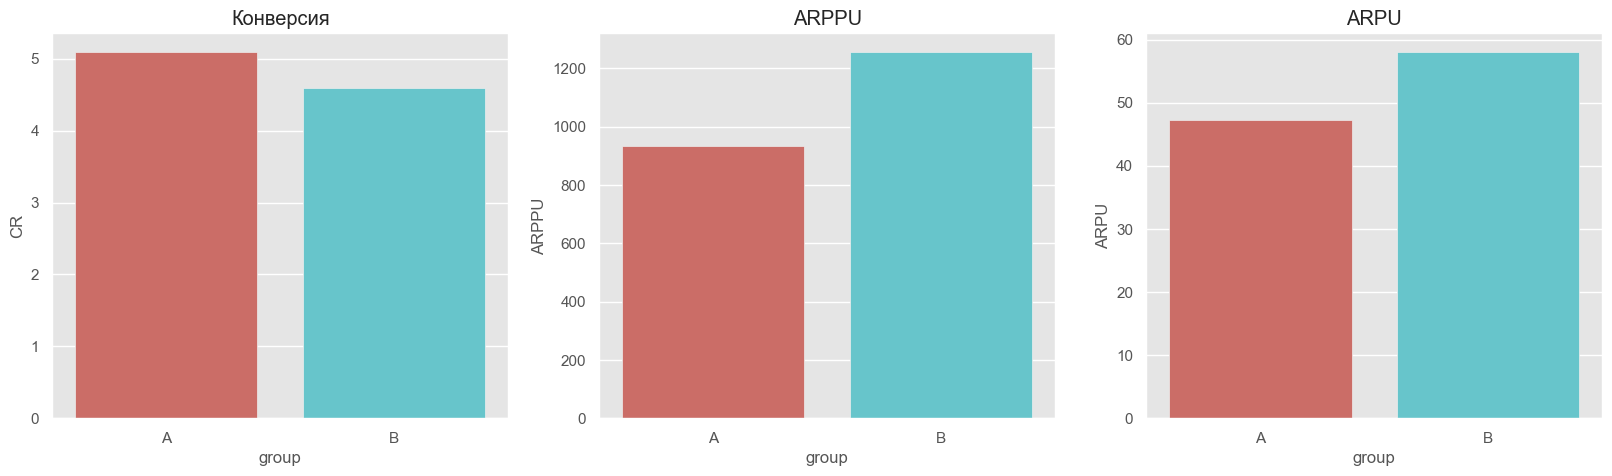

In [90]:
metrics_plot()